In [1]:
import sys
sys.path.append('/afs/inf.ed.ac.uk/user/s15/s1521716/miniconda3/envs/ivc/lib/python3.7/site-packages')

In [2]:
import numpy as np
import scipy as sp
import scipy.io as spo
import matplotlib.pyplot as plt
from skimage import feature
import cv2 as cv
%matplotlib inline

ImportError: No module named 'cv2'

In [ ]:
resize_size=[128 64];

In [7]:
!less ~/ivc/IVC_assignment-2018/data/person_re-identification/person_re-id_train.mat

"/afs/inf.ed.ac.uk/user/s15/s1521716/ivc/IVC_assignment-2018/data/person_re-identification/person_re-id_train.mat" may be a binary file.  See it anyway? 



In [42]:
# load data
test_data = spo.loadmat("/afs/inf.ed.ac.uk/user/s15/s1521716/ivc/IVC_assignment-2018/data/person_re-identification/person_re-id_test.mat")
train_data = spo.loadmat("/afs/inf.ed.ac.uk/user/s15/s1521716/ivc/IVC_assignment-2018/data/person_re-identification/person_re-id_train.mat")

train_image1 = train_data["train"]["image1"].T
train_id1 = train_data["train"]["id1"].T
train_image2 = train_data["train"]["image2"].T
train_id2 = train_data["train"]["id2"].T

test_gallery = test_data["gallery"]["image"].T
test_gallery_id = test_data["gallery"]["id"].T
test_query = test_data["query"]["image"].T
test_query_id = test_data["query"]["id"].T

In [54]:
# set up labels
Y_train = np.ones_like(train_id1)
Y_train[train_id1 != train_id2] = -1

In [ ]:
class ExpParams():
    __init__():
        self.use_colour = False;
        self.use_colour_hsv = False;
        self.colour_nbin = 4;
        self.colour_win_size = [16 16];
        
        self.use_hog = False;
        self.hog_win_size = [16 16];
        self.hog_nbins = 5;
        self.hog_block_size = [4 4];

        self.use_lbp = False;
        self.lbp_win_size = [16 16];
        self.lbp_n_neighbour = 8;
        self.lbp_radius = 1;
        self.is_upright = False;

In [56]:
def extract_features(images, params):
    features = np.array([])
    for image in images:
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
        tmp = np.array([])
        
        if params.use_lbp:
            lbp_feat = feature.local_binary_pattern(gray, params.lbp_n_neighbour, params.lbp_radius)
            tmp = np.hstack((tmp, lbp_feat))
            
        if params.use_colour:
            # do colour stuff
            tmp = np.hstack((tmp, lbp_feat))
            
        if params.use_colour_hsv:
            # do colour stuff
            tmp = np.hstack((tmp, lbp_feat))
            
        if params.use_hog:
            feature.hog(gray, orientations=8, pixels_per_cell=params.hog_win_size,
                    params.cells_per_block=(1, 1), multichannel=True)
            tmp = np.hstack((tmp, lbp_feat))
            
        
def extract_colour_hist(image, params):
    new_shape = tuple(np.array(image.shape) / params.colour_win_size) + params.colour_win_size
        

(2000, 1)

In [61]:
feature.local_binary_pattern(train_image1[0][0], 8, 1)

ValueError: The parameter `image` must be a 2-dimensional array

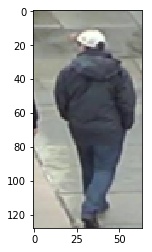

In [51]:
plt.imshow(train_image2[12][0])